# Parametric Hypothesis Testing

In [ ]:
import numpy as np
from scipy.stats import norm, t, ttest_ind, ttest_rel

## Test Concerning the Mean of a Normal Population

**Known Standard Deviation (Z-test)**

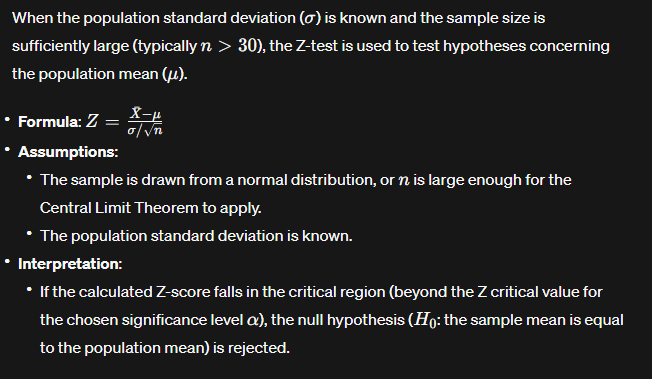

In [ ]:
# Part 1: Test Concerning the Mean of a Normal Population

## 1. Known Standard Deviation (Z-test)

def z_test(sample_mean, population_mean, population_std, sample_size):

    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

    return z_score, p_value



**Unknown Standard Deviation (t-test)**

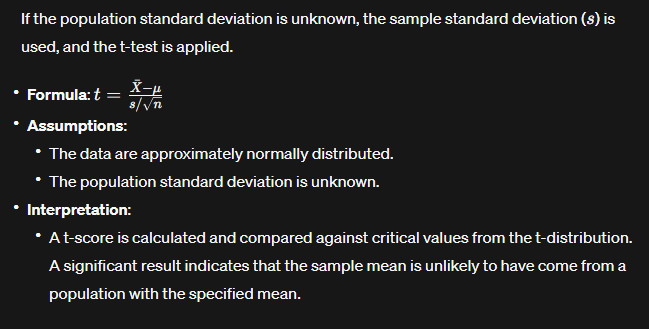

In [ ]:
## 2. Unknown Standard Deviation (t-test)

def one_sample_t_test(sample_mean, population_mean, sample_std, sample_size):

    t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

    p_value = 2 * (1 - t.cdf(np.abs(t_score), df=sample_size-1))

    return t_score, p_value



## Test Concerning the Equality of Means of Two Normal Populations

**Known Variances (Z-test for Two Populations)**

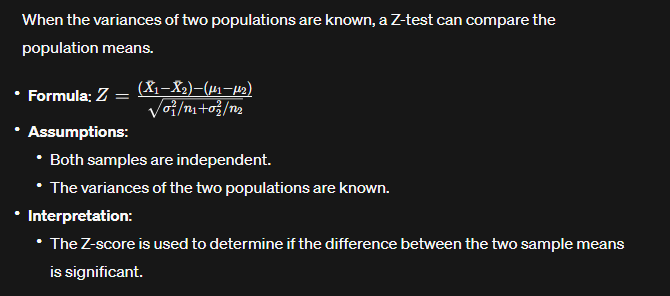

**Unknown but Equal Variances (t-test for Two Independent Samples)**

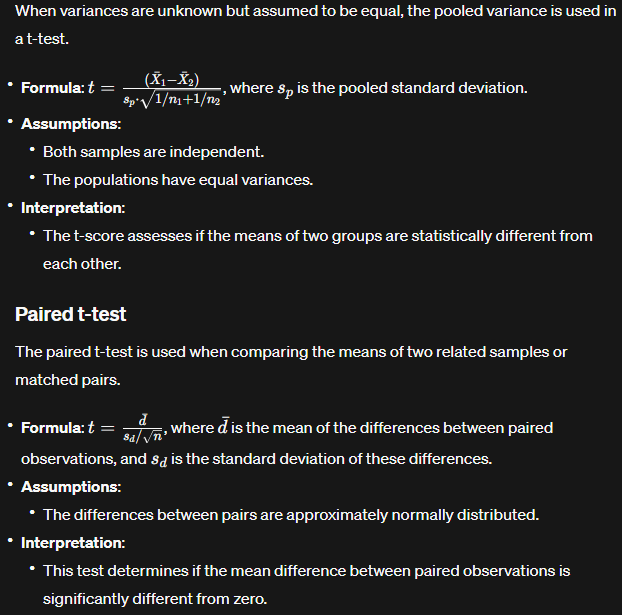

In [ ]:
# Part 2: Test Concerning the Equality of Means of Two Normal Populations

## 1. Known Variances (Z-test for Two Populations)
def z_test_two_pop(sample_mean1, sample_mean2, known_variance1, known_variance2, sample_size1, sample_size2):

    z_score = (sample_mean1 - sample_mean2) / np.sqrt(known_variance1/sample_size1 + known_variance2/sample_size2)

    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))

    return z_score, p_value

## 2. Unknown but Equal Variances (t-test for Two Independent Samples)
def t_test_equal_variances(sample1, sample2):
    t_score, p_value = ttest_ind(sample1, sample2, equal_var=True)
    return t_score, p_value

# Paired t-test
def paired_t_test(before, after):

    t_score, p_value = ttest_rel(before, after)

    return t_score, p_value



# Example Code

In [ ]:
# Known Standard Deviation (Z-test)
z_score, p_value = z_test(sample_mean=105,
                          population_mean=100,
                          population_std=15, sample_size=30)

print(f"Z-test: Z-score={z_score}, p-value={p_value}")

# Unknown Standard Deviation (t-test)
t_score, p_value = one_sample_t_test(sample_mean=105, population_mean=100, sample_std=14.5, sample_size=30)
print(f"One-sample t-test: t-score={t_score}, p-value={p_value}")

# Known Variances (Z-test for Two Populations)
z_score, p_value = z_test_two_pop(sample_mean1=105, sample_mean2=110, known_variance1=15**2, known_variance2=20**2, sample_size1=30, sample_size2=40)
print(f"Z-test for two populations: Z-score={z_score}, p-value={p_value}")

# Unknown but Equal Variances (t-test for Two Independent Samples)
sample1 = np.random.normal(105, 20, 30)
sample2 = np.random.normal(110, 20, 40)
t_score, p_value = t_test_equal_variances(sample1, sample2)
print(f"Independent two-sample t-test: t-score={t_score}, p-value={p_value}")

# Paired t-test
before = np.random.normal(100, 10, 30)
after = before + np.random.normal(-5, 5, 30)
t_score, p_value = paired_t_test(before, after)
print(f"Paired t-test: t-score={t_score}, p-value={p_value}")


# Explanation

**Z-test: Known Standard Deviation**
- Result: Z-score=1.826, p-value=0.068
- Interpretation: With a p-value greater than 0.05, we fail to reject the null hypothesis. This suggests that the sample mean is not significantly different from the population mean, assuming a significance level of 0.05.

**One-Sample t-test: Unknown Standard Deviation**
- Result: t-score=1.889, p-value=0.069
- Interpretation: Similar to the Z-test, the t-test's p-value indicates that the sample mean does not significantly differ from the hypothesized population mean at the 5% significance level.

**Z-test for Two Populations: Known Variances**
- Result: Z-score=-1.195, p-value=0.232
- Interpretation: The p-value suggests no significant difference between the two population means, as it exceeds the typical alpha level of 0.05.

**Independent Two-Sample t-test: Unknown but Equal Variances**
- Result: t-score=-1.507, p-value=0.137
- Interpretation: The p-value indicates that there is no significant difference between the means of the two independent samples, given the significance level of 0.05.

**Paired t-test**
- Result: t-score=6.679, p-value=2.52e-07
- Interpretation: The very small p-value strongly suggests rejecting the null hypothesis, indicating a significant difference in the means of the paired samples. This test is often used to compare measurements taken before and after an intervention on the same subjects.

# Example using real world use case

In [ ]:
!pip install --upgrade gdown

In [ ]:
!gdown --id 1Qk5FZxfA_jhDcxI3YmuEIbVgd8ZeldMn

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/BMI Calculation_MJH.xlsx')

In [ ]:
df.info()

# Paired t-test



*   H0: There is a significant difference of BMI between Before and during covid
*   Ha: There is no significant difference of BMI between before and during covid



In [ ]:
before = df['BMI (Before COVID)']
after = df['BMI (During COVID)']

z_score, p_value = paired_t_test(before,after)

print(f"Paired t-test: t-score={z_score}, p-value={p_value}")

In [ ]:
if p_value<0.05:
  print("reject")
else:
  print("not reject")

Compre between W1 and W2

In [ ]:
sample_mean1 = df['W1'].mean()
sample_mean2 = df['W2'].mean()
known_variance1 = df['W1'].var()
known_variance2 = df['W2'].var()
sample_size1 = df['W1'].count()
sample_size2 = df['W2'].count()

In [ ]:
sample_mean1,sample_mean2,known_variance1, known_variance2,sample_size1,sample_size2

In [ ]:
z_score,p_value=z_test_two_pop(sample_mean1,
               sample_mean2,
               known_variance1,
               known_variance2,
               sample_size1,
               sample_size2)
z_score,p_value

In [ ]:
alpha = 0.05
if p_value < alpha:
  print("reject")
else:
  print("not reject")

In [ ]:
df.info()

In [ ]:
sample_mean1 = df['BMI (Before COVID)'].mean()
sample_mean2 = df['BMI (During COVID)'].mean()
known_variance1 = df['BMI (Before COVID)'].var()
known_variance2 = df['BMI (During COVID)'].var()
sample_size1 = df['BMI (Before COVID)'].count()
sample_size2 = df['BMI (During COVID)'].count()

In [ ]:
z_score,p_value=z_test_two_pop(sample_mean1,
               sample_mean2,
               known_variance1,
               known_variance2,
               sample_size1,
               sample_size2)
z_score,p_value

In [ ]:
alpha = 0.05
if p_value < alpha:
  print("reject")
else:
  print("not reject")

#  Chi-Square Test

**Example Scenario:**

Suppose you want to study if there is an association between gender (male, female) and preference for a type of snack (chips, chocolate, fruit). You surveyed 150 people and recorded their responses. The collected data is summarized in the table below:

|             | Chips | Chocolate | Fruit | Total |
|-------------|-------|-----------|-------|-------|
| Male        | 30    | 20        | 50    | 100   |
| Female      | 20    | 20        | 10    | 50    |
| Total       | 50    | 40        | 60    | 150   |


In [ ]:
# Null Hypothesis (H0): There is no association between gender and snack preference.
import numpy as np
import scipy.stats as stats

# Observed frequencies
observed = np.array([[30, 20, 50], [20, 20, 10]])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

In [ ]:
titanic['sex'].value_counts()

In [ ]:
titanic['class'].value_counts()

In [ ]:
titanic['alive'].value_counts()

* Find out is there any relationship between alive passenger in titanic with class of cabin they stay

In [ ]:
observed = titanic.groupby('alive')['class'].value_counts()

In [ ]:
observed

In [ ]:
# Observed frequencies
observed = np.array([[80, 97, 372], [136, 87, 119]])

# Perform the Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


In [ ]:
if p_value < 0.05:
  print("Reject")
else:
  print("Not Reject")